<a href="https://colab.research.google.com/github/Aditya-11/Eron-Email-Analysis/blob/master/project_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
import pandas as pd

import os 
"""
mypath = os.path.dirname(os.path.realpath('python-project.ipyb'))

print(mypath)

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(onlyfiles)
"""

/content
[]


In [0]:
import pandas as pd

url = 'https://drive.google.com/file/d/1fan6XhI_vvkkF-xakP1i2EY6W0w6xNKf/view?usp=sharing'

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1fan6XhI_vvkkF-xakP1i2EY6W0w6xNKf'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  

df3 = pd.read_csv('data.csv')


#df1 = pd.read_csv(url)


In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
import pandas as pd

df3 = pd.read_csv('data.csv')

data_top = df3.head()  

print(list(data_top))

#print (df3.iloc[2]['Sender'])

print (df3.iloc[2:10]['Subject'])

print (df3.iloc[2:10]['Date'])


print (df3.shape)

#print(df3.describe())


['Sender', 'Receiver', 'Subject', 'Date', 'Message body']
2                                                 test
3                                                  NaN
4                                                Hello
5                                                Hello
6                                                  NaN
7                             PRC review - phone calls
8                           High Speed Internet Access
9    fixed forward or other Collar floor gas price ...
Name: Subject, dtype: object
2    2000-10-18 03:00:00-07:00
3    2000-10-23 06:13:00-07:00
4    2000-08-31 05:07:00-07:00
5    2000-08-31 04:17:00-07:00
6    2000-08-22 07:44:00-07:00
7    2000-07-14 06:59:00-07:00
8    2000-10-17 02:26:00-07:00
9    2000-10-16 06:44:00-07:00
Name: Date, dtype: object
(517401, 5)


In [0]:
print (df3.iloc[190:200]['Sender'])

190    phillip.allen
191    phillip.allen
192    phillip.allen
193    phillip.allen
194    phillip.allen
195    phillip.allen
196    phillip.allen
197    phillip.allen
198    phillip.allen
199    phillip.allen
Name: Sender, dtype: object


In [0]:

#graphs no of emails send vs month/year/day

import datetime
import pandas as pd

df3 = pd.read_csv('data.csv')
 

year = []
month = []
day = []
day_week = []

num = df3.shape[0]

for i in range(50000):
  l1 = df3.iloc[i]['Date']
  try:
    l2 = l1.split('-')
    l3 = l2[2].split(' ')
    today = datetime.datetime(int(l2[0]), int(l2[1]), int(l3[0]))
    year.append(int(l2[0]))
    month.append(int(l2[1]))
    day.append(int(l3[0]))
    day_week.append(today.weekday())

  except:
    pass
print(len(day),len(month),len(year),len(day_week))

df1 = df3[0:len(day)]

try:
  df1['Day'] = day
  df1['Month'] = month
  df1['Year'] = year
  df1['Day_week'] = day_week
except Error as e:
  print(e)

print(df1.iloc[1])



47060 47060 47060 47060
Sender                                              phillip.allen
Receiver                                            john.lavorato
Subject                                                       NaN
Date                                    2001-05-04 13:51:00-07:00
Message body    Traveling to have a business meeting takes the...
Day                                                             4
Month                                                           5
Year                                                         2001
Day_week                                                        4
Name: 1, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

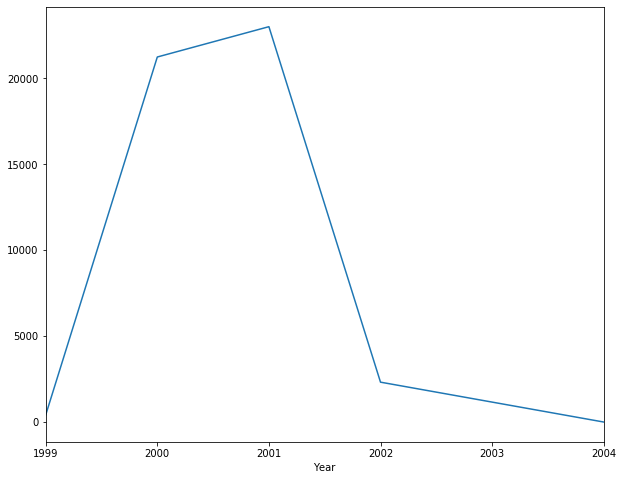

In [0]:
# Year 


import matplotlib.pyplot as plt

indices = (df1['Year'] > 1995) & (df1['Year']<= 2004)

plt.figure(figsize = (10,8))

figure1 = df1.loc[indices].groupby('Year')['Sender'].count().plot()


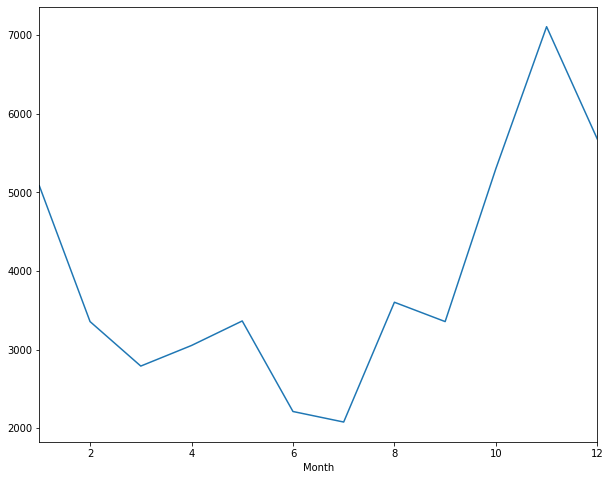

In [0]:
#Month


plt.figure(figsize = (10,8))

figure1 = df1.loc[indices].groupby('Month')['Sender'].count().plot()

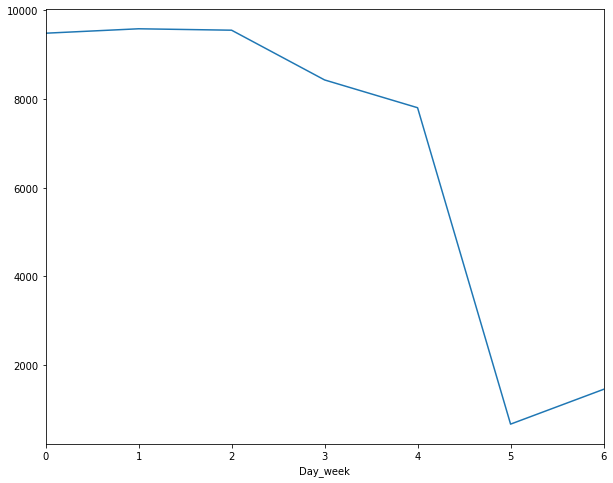

In [0]:
# Day_week


plt.figure(figsize = (10,8))

figure1 = df1.loc[indices].groupby('Day_week')['Sender'].count().plot()


In [0]:
# top 10 frequent user (Sender or Receiver)

import numpy as np

import itertools

hash1 = {}

for i in range(len(day)):
  if df1.iloc[i]['Sender'] in hash1:
    hash1[df1.iloc[i]['Sender']] += 1
  else :
    hash1[df1.iloc[i]['Sender']] = 0
  if df1.iloc[i]['Receiver'] in hash1:
    hash1[df1.iloc[i]['Receiver']]+= 1
  else :
    hash1[df1.iloc[i]['Receiver']] = 0

hash1 = dict(sorted(hash1.items(), key=lambda kv: kv[1], reverse=True))

#print(hash1)

n_items = list(itertools.islice(hash1.items(),10))

name = []
emails = []

for i in n_items:
  name.append(i[0])
  emails.append(int(i[1]))


y_pos = np.arange(len(name))

  


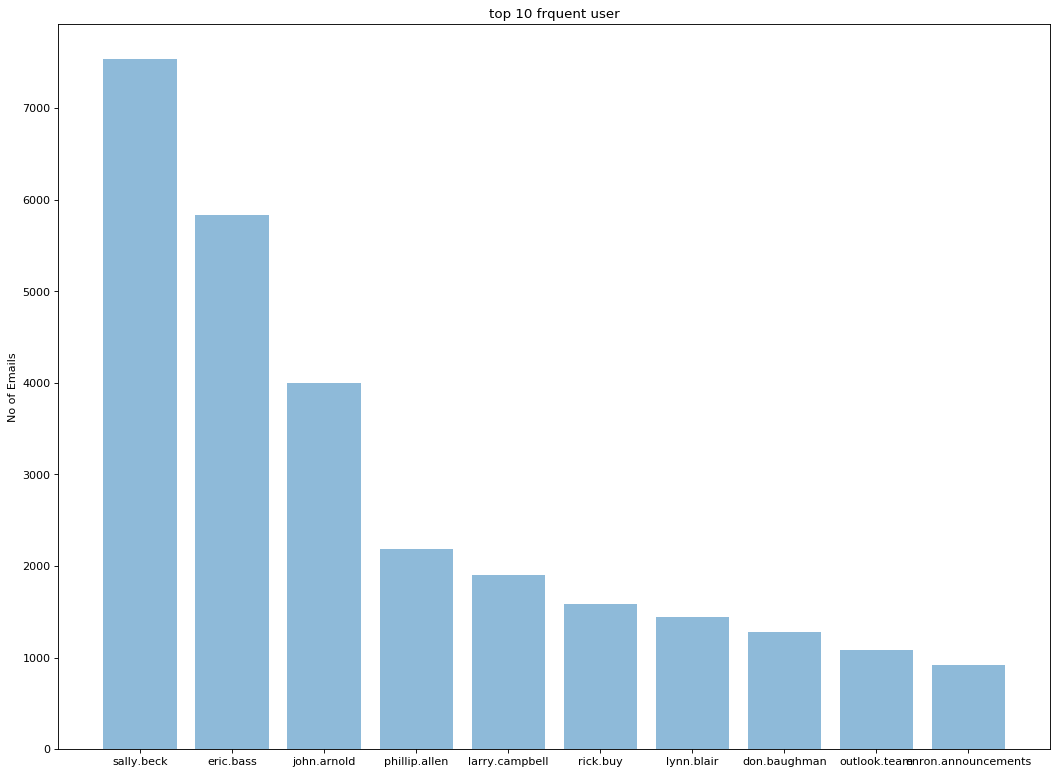

In [0]:
# frequent user plot
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

plt.bar(y_pos, emails, align='center', alpha=0.5)
plt.xticks(y_pos, name)
plt.ylabel('No of Emails')
plt.title('top 10 frquent user')

#plt.figure(figsize = (10,8))

plt.show()


In [0]:
# find Users and number of emails they sent by year
def year_wise(name_1):
  l1 = {}
  for i in range(45000):
    if (df1.iloc[i]['Sender'] == name_1 or df1.iloc[i]['Receiver'] == name_1) :
      if (df1.iloc[i]['Year'] in l1):
        l1[df1.iloc[i]['Year']]+=1;
      else :
        l1[df1.iloc[i]['Year']] = 1;
  
  n_items = list(itertools.islice(l1.items(),len(l1)))

  print(name_1)

  for i in n_items :
    if (i[0] > 1950):
      print(i)


for i in name:
  year_wise(i)


sally.beck
(2001, 2989)
(2000, 4177)
(1999, 72)
(1979, 11)
(2002, 273)
eric.bass
(2000, 4279)
(2001, 1229)
(1999, 34)
(2002, 288)
(2004, 2)
john.arnold
(2000, 1536)
(2001, 2410)
(1979, 7)
(2002, 2)
phillip.allen
(2001, 981)
(2000, 1185)
(1999, 6)
(1979, 8)
(2002, 5)
larry.campbell
(2001, 949)
(2002, 6)
(2000, 299)
(1999, 50)
(2020, 2)
rick.buy
(2000, 731)
(2001, 787)
(2002, 5)
(1999, 43)
(1979, 2)
lynn.blair
(2001, 1024)
(2000, 220)
(2002, 150)
don.baughman
(2002, 118)
(2001, 774)
(2000, 359)
(1999, 4)
outlook.team
(2001, 651)
(2000, 342)
(2002, 92)
enron.announcements
(2000, 324)
(2001, 423)
(2002, 66)
(1999, 12)
(1979, 1)


In [0]:
# Check whether emails were to a single person or multiple people



"""
def direct(name_1 , no):
  l1 = []
  for i in range(45000):
    try:
      #if ((df1.iloc[i]['Receiver'] not in l1)  and (df1.iloc[i]['Sender'] == name_1)):
      #  l1.append(df1.iloc[i]['Receiver'])
      l1 = df1.iloc[i]['Message Body'].split(',')
    except Exception as e:
      pass

  if (len(l1) == 1):
    print(name_1,"Direct",no)
  else:
    print(name_1,"Non-Direct",no)


for i in name:
  print(hash1[i])
  direct(i,hash1[i])
"""



'\ndef direct(name_1 , no):\n  l1 = []\n  for i in range(45000):\n    try:\n      #if ((df1.iloc[i][\'Receiver\'] not in l1)  and (df1.iloc[i][\'Sender\'] == name_1)):\n      #  l1.append(df1.iloc[i][\'Receiver\'])\n      l1 = df1.iloc[i][\'Message Body\'].split(\',\')\n    except Exception as e:\n      pass\n\n  if (len(l1) == 1):\n    print(name_1,"Direct",no)\n  else:\n    print(name_1,"Non-Direct",no)\n\n\nfor i in name:\n  print(hash1[i])\n  direct(i,hash1[i])\n'

In [0]:
# clean data 


import re
#import stopwords

def clean_column(data):
    if data is not None:
      try:
          data =  data.lower()
          data = re.sub('re:', '', data)
          data = re.sub('-', '', data)
          data = re.sub('_', '', data)
          # Remove data between square brackets
          data =re.sub('\[[^]]*\]', '', data)
          # removes punctuation
          data = re.sub(r'[^\w\s]','',data)
          data = re.sub(r'\n',' ',data)
          data = re.sub(r'[0-9]+','',data)
          # strip html 
          p = re.compile(r'<.*?>')
          data = re.sub(r"\'ve", " have ", data)
          data = re.sub(r"can't", "cannot ", data)
          data = re.sub(r"n't", " not ", data)
          data = re.sub(r"I'm", "I am", data)
          data = re.sub(r" m ", " am ", data)
          data = re.sub(r"\'re", " are ", data)
          data = re.sub(r"\'d", " would ", data)
          data = re.sub(r"\'ll", " will ", data)
          data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
          data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
          
          data = p.sub('', data)
          if 'forwarded by:' in data:
            data = data.split('subject')[1]
          data = data.strip()
          return data
      except:
        return 'No Subject'
    return 'No Subject'

df1['Subject_new'] = df1['Subject'].apply(clean_column)
df1['body_new'] = df1['Message body'].apply(clean_column)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


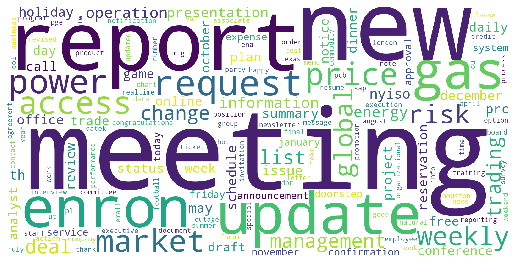

In [0]:
#subject_new


from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

stopwords.add('cc')
stopwords.add('subject')
stopwords.add('etc')
stopwords.add('pm')
stopwords.add('ga')

wordcloud = WordCloud(
                       collocations = False,
                       width=1600, height=800,
                       background_color='white',
                       stopwords=stopwords,
                       max_words=150, 
                       random_state=42
                      ).generate(' '.join(df1['Subject_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [0]:
!pip3 install nltk

import nltk

from nltk import word_tokenize 

nltk.download('punkt')

from nltk.stem import PorterStemmer


stemmer = PorterStemmer()
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

df1['Subject_new'] = df1['Subject_new'].apply(tokenize_and_stem)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
print(df1.iloc[19]['Subject_new'])

s = ' '
s = s.join(df1.ix[19,'Subject_new'])

print(str(s))

['storag', 'strategi', 'in', 'the', 'west']
storag strategi in the west


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


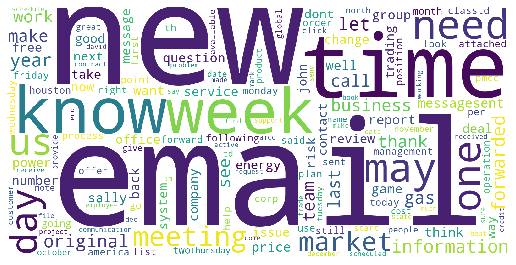

In [0]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

stopwords.add('cc')
stopwords.add('subject')
stopwords.add('etc')
stopwords.add('pm')
stopwords.add('ga')
stopwords.add('will')
stopwords.add('enron')
stopwords.add('please')


wordcloud = WordCloud(
                       collocations = False,
                       width=1600, height=800,
                       background_color='white',
                       stopwords=stopwords,
                       max_words=150, 
                       random_state=42
                      ).generate(' '.join(df1['body_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [0]:

for i in range(df1.size):
    try:
      s = ' '
      s = s.join(df1.iloc[i]['Subject_new'])
      df1.ix[i,'Subject_new'] = s
    except:
      pass

print(df1.ix[12,'Subject_new'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


issu to do list


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [0]:
print(df1.ix[46004,'Subject_new'])

result of footbal pool


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [231]:
# Apply knn clustering to subjects


documents = []

for i in range(45000):
  #l1 = str(df1.iloc[i]['Subject_new']).split(' ')
  #for j in l1:
  documents.append(str(df1.iloc[i]['Subject_new']))


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(documents)

true_k = 2

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=20 , algorithm = 'auto',n_jobs=20, precompute_distances='auto', tol=0.0001)

model.fit(X)

prediction = model.predict(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")


Top terms per cluster:
Cluster 0:
 meet
 report
 updat
 new
 trade
 request
 enron
 ga
 oper
 manag
Cluster 1:
 subject
 zpro
 fernley
 fedex
 fee
 feed
 feedback
 feeder
 feel
 feinstein


